In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fast_inference import SSDFastApplier
from os.path import join

In [3]:
images_path = '/sly_task_data/data/' # it could be one image or directory with several images

In [4]:
# inference params
settings = {
  "device_id": 0,
  "gpu_devices": [
    0
  ],
  "min_score_threshold": 0.5,
  "model_classes": {
    "save_classes": "__all__",
    "add_suffix": "_detected"
  },
  "existing_objects": {
    "save_classes": [],
    "add_suffix": ""
  },
  "mode": {
    "source": "full_image"
  }
}

In [5]:
applier = SSDFastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-10-01T15:12:01.352Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"person": 1, "bicycle": 2, "car": 3, "motorcycle": 4, "airplane": 5, "bus": 6, "train": 7, "truck": 8, "boat": 9, "traffic light": 10, "fire hydrant": 11, "stop sign": 13, "parking meter": 14, "bench": 15, "bird": 16, "cat": 17, "dog": 18, "horse": 19, "sheep": 20, "cow": 21, "elephant": 22, "bear": 23, "zebra": 24, "giraffe": 25, "backpack": 27, "umbrella": 28, "handbag": 31, "tie": 32, "suitcase": 33, "frisbee": 34, "skis": 35, "snowboard": 36, "sports ball": 37, "kite": 38, "baseball bat": 39, "baseball glove": 40, "skateboard": 41, "surfboard": 42, "tennis racket": 43, "bottle": 44, "wine glass": 46, "cup": 47, "fork": 48, "knife": 49, "spoon": 50, "bowl": 51, "banana": 52, "apple": 53, "sandwich": 54, "orange": 55, "broccoli": 56, "carrot": 57, "hot dog": 58, "pizza": 59, "donut": 60, "cake": 61, "chair": 6

INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
WARN:tensorflow:From /workdir/src/tf_ssd/models/research/object_detection/exporter.py:351: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
INFO:tensorflow:Restoring parameters from /sly_task_data/model/model_weights/model.ckpt
INFO:tensorflow:Froze 410 variables.
Converted 410 variables to const ops.


{"message": "Restored model weights from training.", "timestamp": "2018-10-01T15:12:16.859Z", "level": "info"}
{"message": "Weights are loaded.", "timestamp": "2018-10-01T15:12:16.932Z", "level": "info"}
{"message": "Model is ready to inference.", "timestamp": "2018-10-01T15:12:16.934Z", "level": "info"}


In [6]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [7]:
# Get images list
imgs_list = get_imgs_list(images_path)

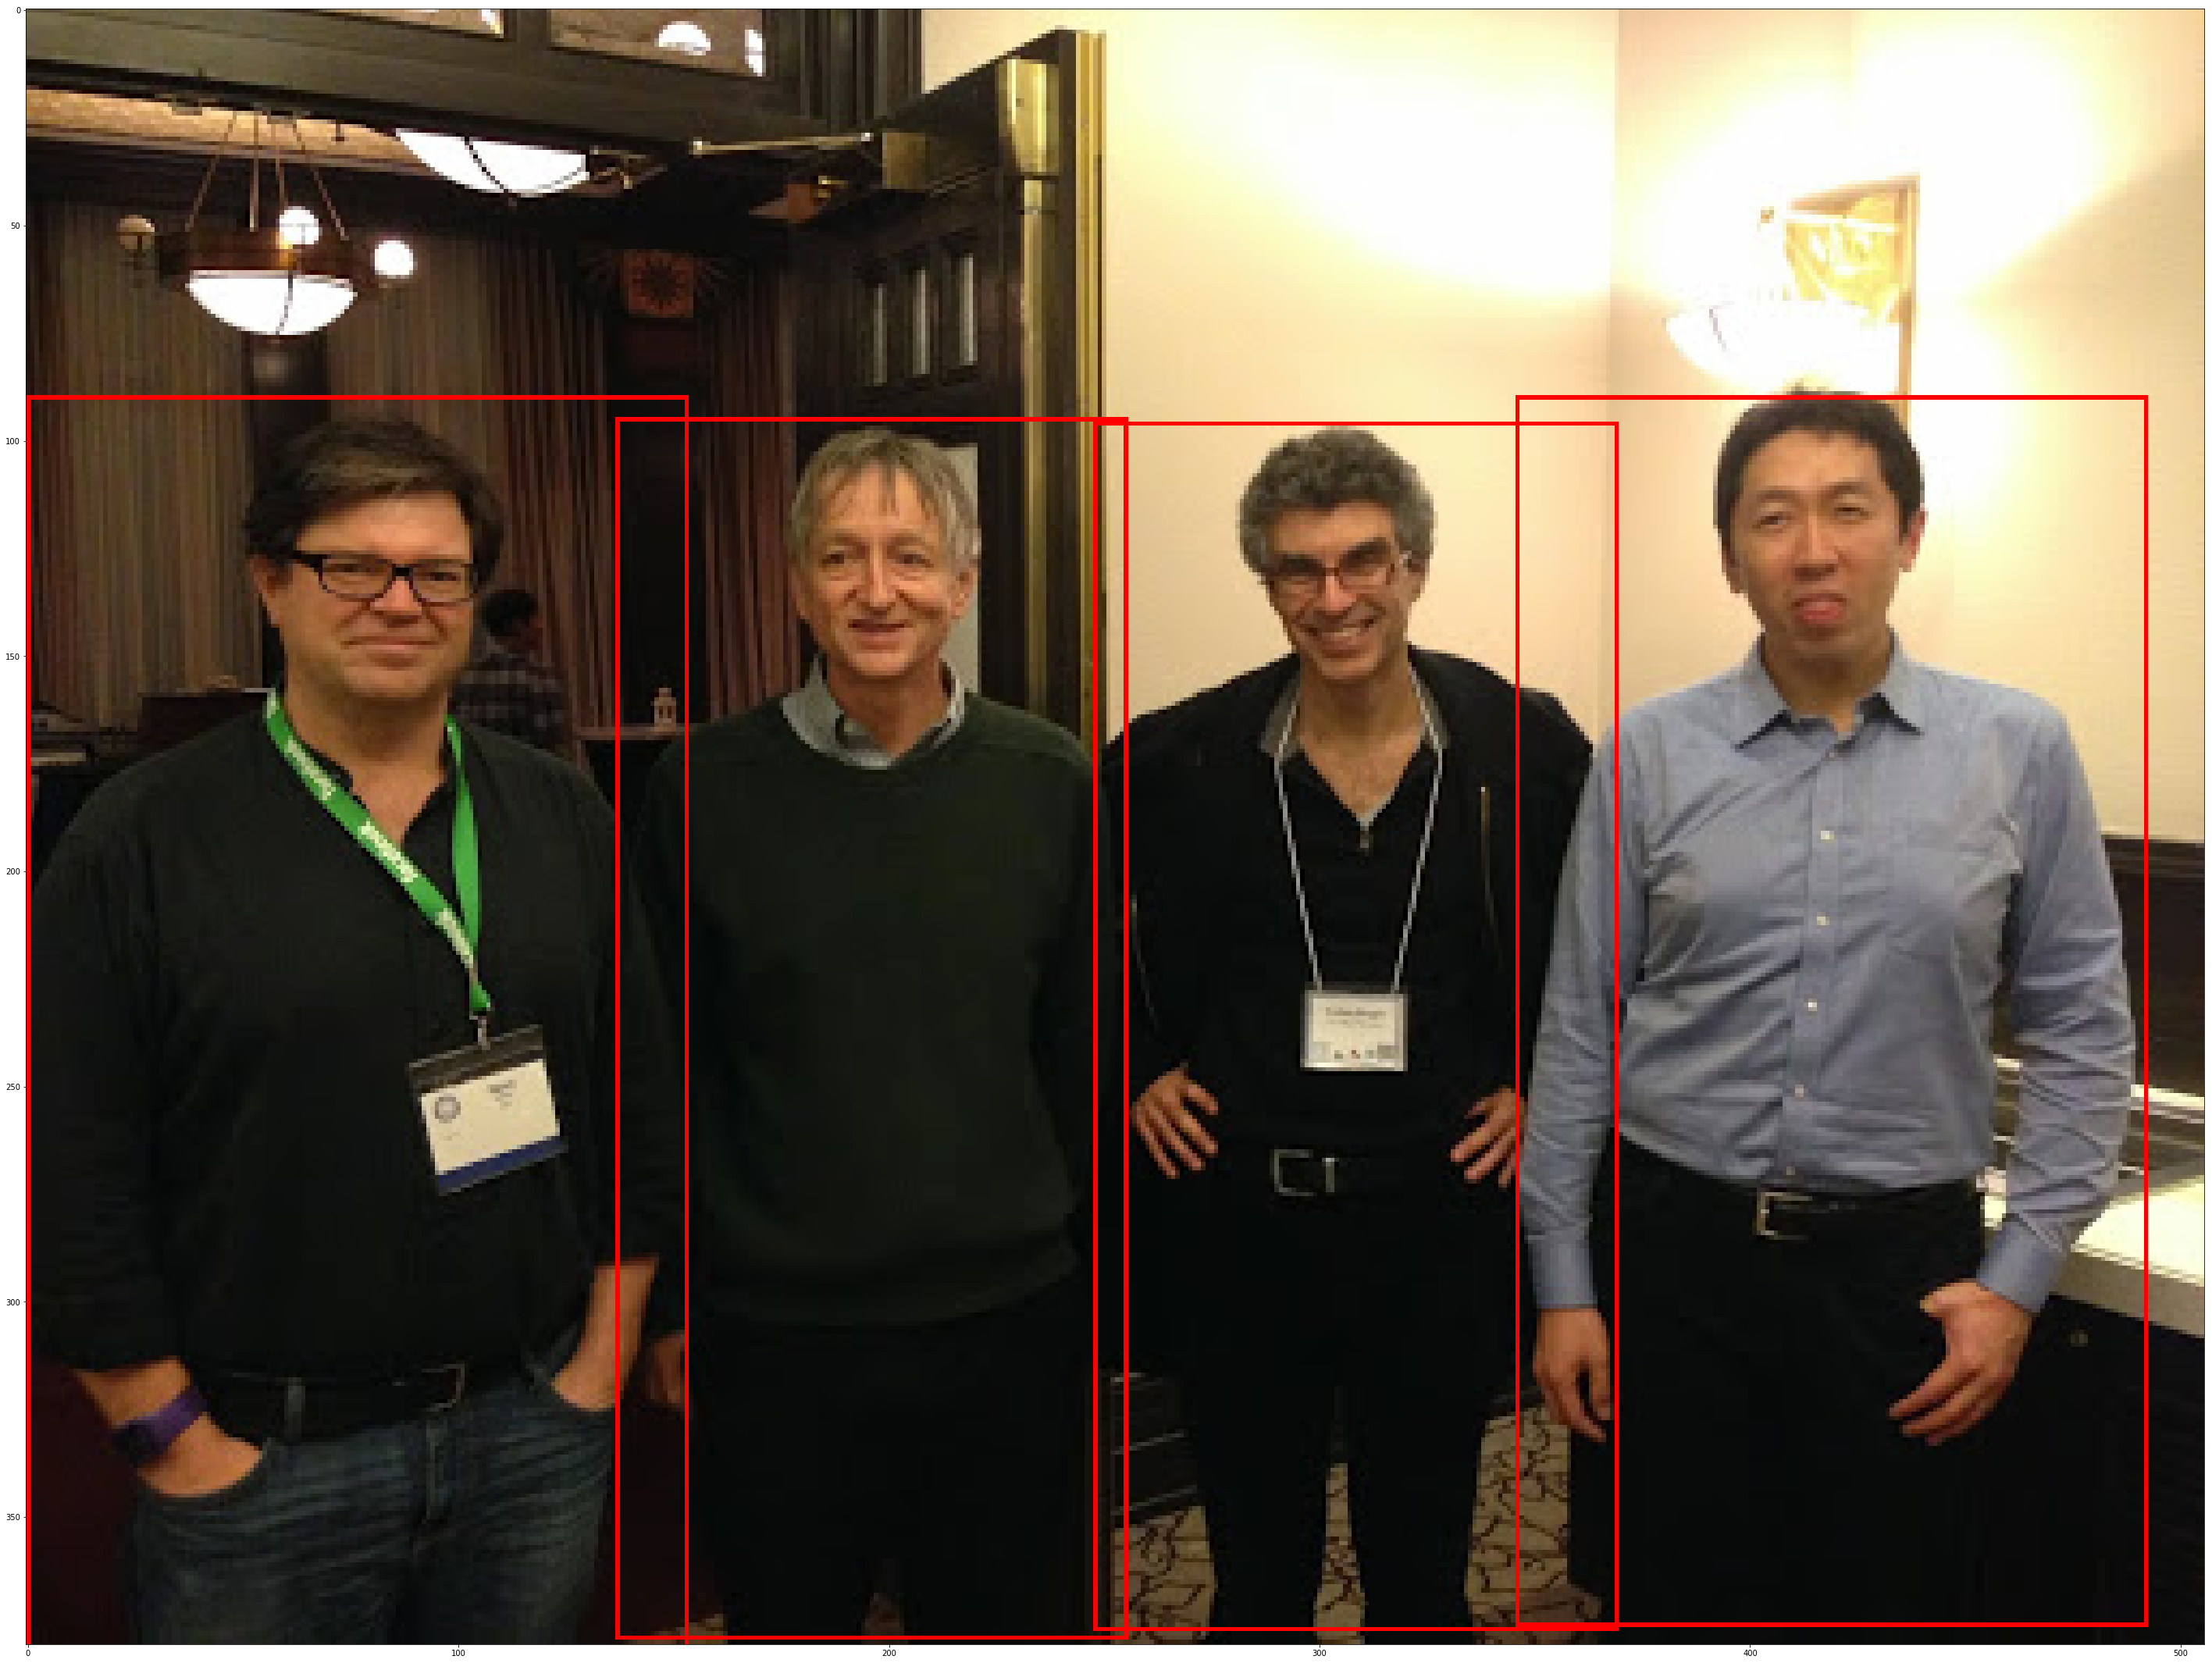

In [8]:
for img_fp in imgs_list:
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = applier.inference(image)
    for obj in mask["objects"]:
        obj.draw_contour(image, [255,0,0], 1)
    plt.figure(figsize=(50, 50))
    plt.imshow(image)
    plt.show()